# 📊 Term Deposit Subscription Prediction

## Problem Statement
Banks run marketing campaigns to convince customers to subscribe to term deposits.  
Contacting every customer is costly and inefficient.

## Objective
- Predict whether a customer will subscribe to a term deposit (`yes` or `no`)
- Build and evaluate classification models
- Compare Logistic Regression and Random Forest
- Use metrics like Confusion Matrix, Classification Report, and ROC-AUC


# Step 1: Import Required Libraries

In [3]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

import shap
print("All libraries imported successfully")


All libraries imported successfully


# Step 2: Load the dataset

In [4]:
# Load the dataset
df = pd.read_csv("bank.csv", sep=';')

# Show dataset shape
print("Dataset Shape:", df.shape)

# Display first 5 rows
df.head()


Dataset Shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Step 3: Dataset Exploration

In [5]:
# Dataset information
df.info()
# Statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Step 4: Data Cleaning
Steps performed:
- Checked missing values
- Removed duplicate rows
- Encoded target variable


In [6]:
# Check missing values
print("Missing values:\n", df.isnull().sum())
# Check duplicate rows
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)

# Remove duplicates if any
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Duplicate rows: 12
Shape after removing duplicates: (41176, 21)


# Step 5: Encode target variable

In [7]:
# Encode target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Check target distribution
df['y'].value_counts()


y
0    36537
1     4639
Name: count, dtype: int64

# Step 6: Exploratory Data Analysis (EDA)
- Analyze target distribution
- Understand feature relationships
- Identify imbalance in data


# 1: Visualize target variable distribution

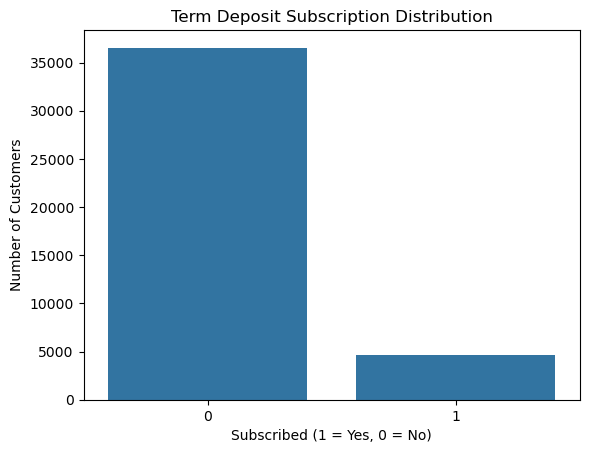

In [8]:
# Visualize target variable distribution
sns.countplot(x='y', data=df)
plt.title("Term Deposit Subscription Distribution")
plt.xlabel("Subscribed (1 = Yes, 0 = No)")
plt.ylabel("Number of Customers")
plt.show()


## Key Observations

- The number of customers who **did not subscribe (0)** is significantly higher than those who **subscribed (1)**.
- The dataset shows a **strong class imbalance**, with non-subscribers making up the vast majority of records.
- Only a **small proportion of customers** accepted the term deposit offer.
- This imbalance indicates that subscription is a **rare event** in the dataset.

## Insights

- The low subscription rate suggests that **term deposit campaigns have limited overall success** and require better targeting.
- Due to class imbalance, **accuracy alone is not a reliable performance metric** for predictive models built on this data.
- Metrics such as **precision, recall, F1-score, and ROC-AUC** should be prioritized to properly evaluate model performance.
- From a business perspective, identifying customers with a **higher likelihood of subscription** is more valuable than mass marketing, as even small improvements can lead to significant gains.


# 2: Age distribution by subscription status

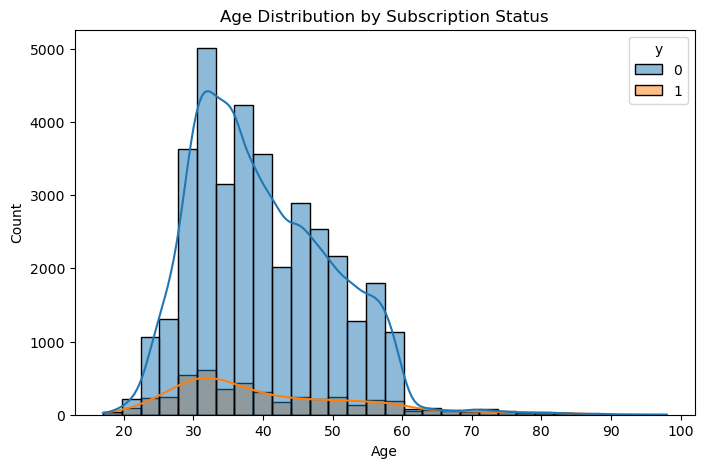

In [9]:
# Age distribution by subscription status
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='y', bins=30, kde=True)
plt.title("Age Distribution by Subscription Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


## Key Observations

- Most customers fall within the **25–50 age range**, regardless of subscription status.
- Non-subscribers (`0`) dominate across all age groups, reflecting the overall class imbalance.
- Subscribers (`1`) are **more concentrated in the middle-aged segment**, roughly between **30 and 55 years**.
- Very **young (<25)** and **older (>60)** customers show **low subscription counts**.
- The subscriber distribution is **narrower and slightly shifted toward higher ages** compared to non-subscribers.

---

## Insights

- **Age influences subscription behavior**, but it is not the sole deciding factor.
- Middle-aged customers are **more likely to subscribe** compared to very young or elderly customers.
- Marketing campaigns targeting **working-age individuals (30–55)** are likely to be more effective.
- Since non-subscribers dominate every age group, **age alone cannot reliably predict subscription**.
- For predictive modeling, age should be used **in combination with other features** (job, balance, contact type, previous outcome) to improve performance.


#  3:Job vs subscription

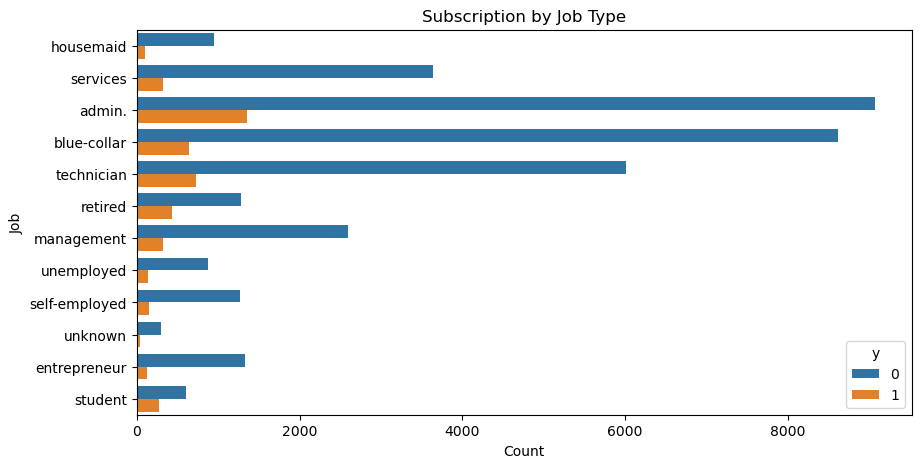

In [10]:
# Job vs subscription
plt.figure(figsize=(10,5))
sns.countplot(y='job', hue='y', data=df)
plt.title("Subscription by Job Type")
plt.xlabel("Count")
plt.ylabel("Job")
plt.show()


## Key Observations

- The **admin., blue-collar, and technician** job categories have the **highest number of customers** overall.
- Non-subscribers (`0`) dominate **every job category**, confirming strong class imbalance.
- **Admin.** and **blue-collar** roles show relatively higher counts of subscribers compared to other jobs.
- **Students, housemaids, and unknown** job categories have the **lowest subscription counts**.
- Retired and management customers have **fewer total customers**, but visible subscription activity exists.

## Insights

- Job type clearly affects **subscription likelihood**, but volume alone is misleading.
- High subscription counts in admin. and blue-collar roles are partly due to **large population size**, not necessarily higher conversion rates.
- Job categories such as **management, retired, and entrepreneur** may have **better conversion potential** despite smaller sample sizes.
- Mass targeting large job groups without considering conversion rate would **waste resources**.
- Job type should be treated as a **key categorical feature** in predictive models, ideally using proper encoding and combined with income-related variables.


# 4: Call duration vs subscription

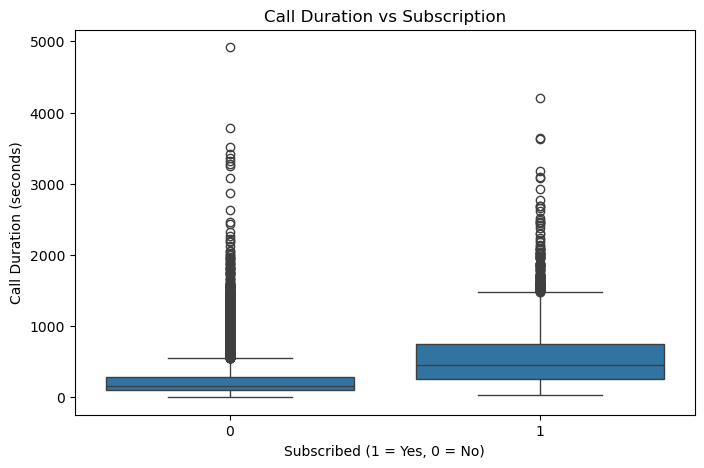

In [11]:
# Call duration vs subscription
plt.figure(figsize=(8,5))
sns.boxplot(x='y', y='duration', data=df)
plt.title("Call Duration vs Subscription")
plt.xlabel("Subscribed (1 = Yes, 0 = No)")
plt.ylabel("Call Duration (seconds)")
plt.show()


## 🔍 Key Observations

Customers who subscribed (1) show significantly higher call durations compared to non-subscribers (0).

The median call duration for subscribers is substantially greater than that of non-subscribers.

The entire distribution of call duration for subscribers is shifted upward, indicating consistently longer engagement.

A large number of high-duration outliers exist among subscribers, suggesting long conversations are strongly associated with successful conversions.

Call duration exhibits a right-skewed distribution, with a few extremely long calls.
 ## 💡 Insights

Call duration is a strong predictor of subscription outcome.

Longer calls likely reflect higher customer engagement and more effective agent interaction.

This feature should be treated as high-importance in predictive modeling.

Since call duration is known only after a call ends, it is suitable for post-call prediction or performance analysis, but may cause data leakage if used for pre-call predictions.

Improving agent techniques that increase meaningful conversation time could directly improve conversion rates.   

# 5: Previous campaign outcome vs subscription

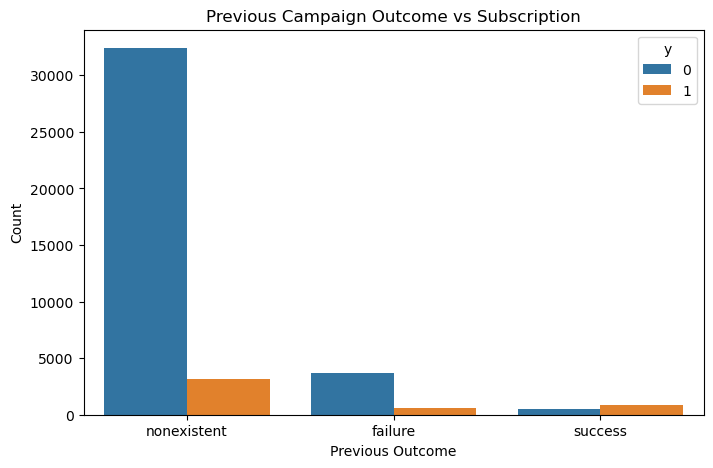

In [12]:
# Previous campaign outcome vs subscription
plt.figure(figsize=(8,5))
sns.countplot(x='poutcome', hue='y', data=df)
plt.title("Previous Campaign Outcome vs Subscription")
plt.xlabel("Previous Outcome")
plt.ylabel("Count")
plt.show()


## 🔍 Key Observations

Customers with a previous outcome of failure rarely subscribe in the current campaign.

The nonexistent group contains the largest number of customers, but most of them do not subscribe.

The distribution of subscription outcomes varies sharply across previous outcome categories, indicating strong dependence.
## 💡 Insights

Previous campaign outcome is a high-impact predictor of current subscription behavior.

Customers who subscribed before are significantly more likely to subscribe again.

Customers who previously failed to convert have a low probability of future subscription.

This feature should be retained and properly one-hot encoded for modeling.

Marketing strategy should prioritize customers with past successes and apply different approaches for previous failures.

# Step 7: Separate features and target

In [13]:
# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

print("Categorical Columns:", list(cat_cols))
print("Numerical Columns:", list(num_cols))


Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical Columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


# Step 8: Train-test split

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (32940, 20)
Testing set size: (8236, 20)


# Step 9: Preprocessing pipeline

In [15]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

print("Preprocessing pipeline created")


Preprocessing pipeline created


# Step 10: Logistic Regression Model Trained

In [16]:
# Logistic Regression pipeline
log_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=2000))
])

# Train model
log_model.fit(X_train, y_train)

print("Logistic Regression model trained")


Logistic Regression model trained


# Step 11:Evaluation of Logistic Regression

## A: Classification Report

In [17]:
# Predictions
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Classification Report
print("Logistic Regression Classification Report\n")
print(classification_report(y_test, y_pred_log, target_names=['No', 'Yes']))


Logistic Regression Classification Report

              precision    recall  f1-score   support

          No       0.93      0.97      0.95      7308
         Yes       0.65      0.42      0.51       928

    accuracy                           0.91      8236
   macro avg       0.79      0.70      0.73      8236
weighted avg       0.90      0.91      0.90      8236



## 📊 Logistic Regression – Classification Report Analysis

### 🔹 Overall Performance
- **Accuracy:** 0.91  
- The high accuracy is **misleading** due to class imbalance.
- The model performs very well on the majority class (**No**) but struggles with the minority class (**Yes**).

---

## 🧮 Class-wise Evaluation

### 🔸 Class: No (Majority Class)

- **Precision:** 0.93  
  → When the model predicts *No*, it is correct 93% of the time.
- **Recall:** 0.97  
  → The model correctly identifies 97% of actual *No* cases.
- **F1-score:** 0.95  
  → Excellent performance driven by class dominance.
- **Support:** 7308  

**Interpretation:**  
The model is heavily biased toward the majority class and performs exceptionally well here.

---

### 🔸 Class: Yes (Minority Class)

- **Precision:** 0.65  
  → 65% of predicted *Yes* cases are actually *Yes*.
- **Recall:** 0.42  
  → The model misses **58% of actual Yes cases**.
- **F1-score:** 0.51  
  → Weak overall performance for the minority class.
- **Support:** 928  

**Interpretation:**  
The model fails to detect more than half of the positive cases, which is a serious issue if *Yes* is important.

---

## ⚠️ Why Accuracy Is Not Reliable Here

- The dataset is **highly imbalanced**.
- Predicting the majority class most of the time still yields high accuracy.
- Accuracy does not reflect the model’s poor ability to detect *Yes* cases.

---

## 📉 Macro vs Weighted Averages

- **Macro Average**
  - Treats both classes equally.
  - Reveals imbalance more clearly.
  - **Recall:** 0.70, **F1-score:** 0.73

- **Weighted Average**
  - Dominated by the majority class.
  - Appears strong but is misleading.
  - **F1-score:** 0.90

**Conclusion:**  
Macro metrics provide a more honest evaluation in imbalanced datasets.

---

## 🧠 Key Insights

- The model is **excellent at predicting No**.
- The model is **weak at identifying Yes**.
- High accuracy hides poor minority-class performance.
- The current model is **not suitable** if detecting *Yes* is critical.

---

## 🔧 Recommended Improvements

1. **Handle class imbalance**
   ```python
   LogisticRegression(class_weight='balanced')


## B: Confusion Matrix

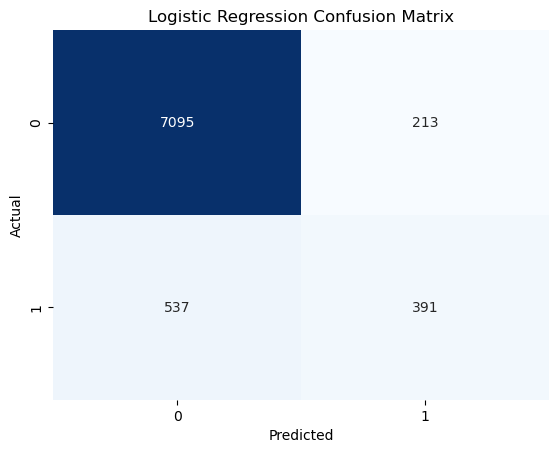

In [18]:
# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 📊 Logistic Regression – Confusion Matrix Analysis

## 🔢 Confusion Matrix

|               | Predicted 0 | Predicted 1 |
|--------------|-------------|-------------|
| **Actual 0** | 7095        | 213         |
| **Actual 1** | 537         | 391         |

**Total Samples:** 8236  
**Class 0 (Majority):** 7308  
**Class 1 (Minority):** 928  

---

## 📈 Key Performance Metrics

### Accuracy
**90.9%**

High overall accuracy, but inflated due to class imbalance.

---

### Precision (Class 1)
**64.7%**

When the model predicts Class 1, it is correct about 65% of the time.

---

### Recall (Class 1)
**42.1%**

The model detects only 42% of actual Class 1 cases.  
It misses 58% of the positive class.

---

### Specificity (Class 0)
**97.1%**

The model is very strong at correctly identifying Class 0.

---

### F1 Score (Class 1)
**≈ 51%**

Moderate balance between precision and recall, but reduced due to low recall.

---

# 🚨 Critical Observations

- The dataset is heavily imbalanced.
- The model is biased toward predicting Class 0.
- Accuracy is misleading in this context.
- False Negatives (537) are high compared to True Positives (391).
- The model prioritizes avoiding false positives over detecting true positives.

---

# 🎯 Conclusion

This model performs well on the majority class but struggles to detect the minority class.  

If Class 1 represents an important outcome (e.g., fraud, churn, disease), the current model is underperforming and requires optimization focused on improving recall.


## C: ROC Curve

Logistic Regression ROC-AUC: 0.9389354545325861


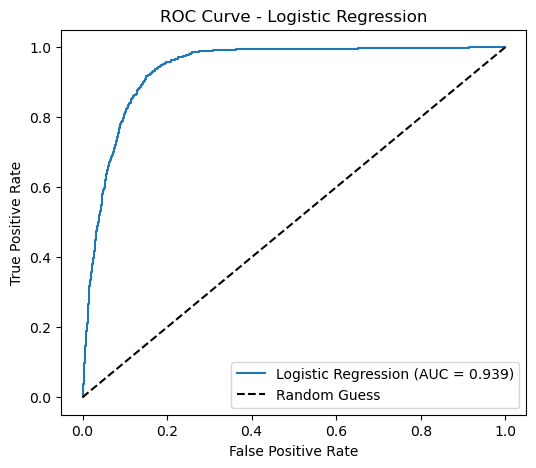

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for positive class
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Compute ROC-AUC
roc_auc_log = roc_auc_score(y_test, y_prob_log)
print("Logistic Regression ROC-AUC:", roc_auc_log)

# Compute False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y_test, y_prob_log)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_log:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


#  Step 12: Random Forest Model Trained

In [20]:
# Random Forest pipeline
rf_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ))
])

# Train model
rf_model.fit(X_train, y_train)

print("Random Forest model trained")


Random Forest model trained


# Step 13: Evaluation of Random Forest Model

## A: Classification Report

In [21]:
# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Classification Report
print("Random Forest Classification Report\n")
print(classification_report(y_test, y_pred_rf, target_names=['No', 'Yes']))


Random Forest Classification Report

              precision    recall  f1-score   support

          No       0.93      0.97      0.95      7308
         Yes       0.65      0.44      0.53       928

    accuracy                           0.91      8236
   macro avg       0.79      0.71      0.74      8236
weighted avg       0.90      0.91      0.90      8236



## 🌲 Random Forest – Classification Report Analysis

### 🔹 Overall Performance
- **Accuracy:** 0.91  
- The accuracy is **inflated by the majority class (No)**.
- Despite using a more powerful model, overall accuracy **did not improve** compared to Logistic Regression.

---

## 🧮 Class-wise Performance

### 🔸 Class: No (Majority Class)

- **Precision:** 0.93  
  → When the model predicts *No*, it is correct 93% of the time.
- **Recall:** 0.97  
  → Correctly identifies 97% of actual *No* cases.
- **F1-score:** 0.95  
  → Very strong and stable performance.
- **Support:** 7308  

**Interpretation:**  
Random Forest easily learns the majority class and performs almost perfectly here.

---

### 🔸 Class: Yes (Minority Class)

- **Precision:** 0.65  
  → 65% of predicted *Yes* cases are actually *Yes*.
- **Recall:** 0.44  
  → The model detects only **44% of actual Yes cases**.
- **F1-score:** 0.53  
  → Slight improvement over Logistic Regression but still weak.
- **Support:** 928  

**Interpretation:**  
The model still misses **more than half of the positive cases**, which is unacceptable if *Yes* is important.

---

## ⚠️ Key Observations

- Random Forest **did not significantly outperform** Logistic Regression.
- Minority class recall improved slightly (**0.42 → 0.44**), but the gain is marginal.
- Model remains **biased toward the majority class**.
- Increasing model complexity alone **does not fix class imbalance**.

---

## 📉 Macro vs Weighted Averages

- **Macro Average**
  - Treats both classes equally.
  - **Recall:** 0.71  
  - **F1-score:** 0.74  
  - Provides a more realistic evaluation under imbalance.

- **Weighted Average**
  - Dominated by the majority class.
  - **F1-score:** 0.90  
  - Masks poor minority class performance.

---

## 🧠 Model Comparison Insight

| Model              | Recall (Yes) | F1 (Yes) | Accuracy |
|-------------------|-------------|----------|----------|
| Logistic Regression | 0.42        | 0.51     | 0.91     |
| Random Forest      | 0.44        | 0.53     | 0.91     |

**Conclusion:**  
Random Forest provides only a **minor improvement** for the minority class while keeping accuracy unchanged.

---

## 🔧 Recommended Next Steps

1. **Apply class weighting**
   ```python
   RandomForestClassifier(class_weight='balanced')


## B:  Confusion Matrix

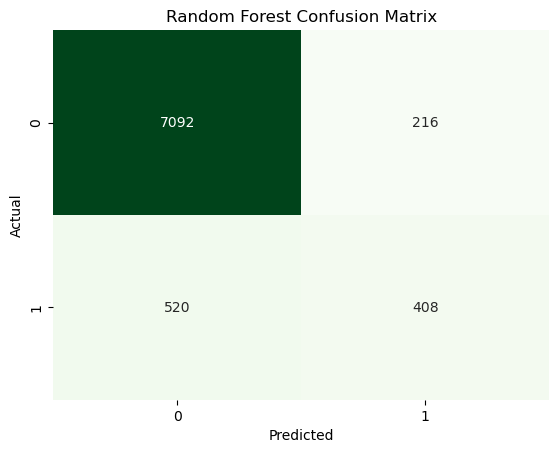

In [22]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 🌲 Random Forest – Confusion Matrix Analysis

## 🔢 Confusion Matrix

|               | Predicted 0 | Predicted 1 |
|--------------|-------------|-------------|
| **Actual 0** | 7092        | 216         |
| **Actual 1** | 520         | 408         |

**Total Samples:** 8236  
**Class 0 (Majority):** 7308  
**Class 1 (Minority):** 928  

---

## 📈 Key Performance Metrics

### Accuracy
**≈ 91.1%**

Slightly higher than Logistic Regression, but still influenced by class imbalance.

---

### Precision (Class 1)
**≈ 65.4%**

When the model predicts Class 1, it is correct about 65% of the time.

---

### Recall (Class 1)
**≈ 44.0%**

The model correctly detects 44% of actual Class 1 cases.  
It still misses 56% of positives.

---

### Specificity (Class 0)
**≈ 97.0%**

Very strong at correctly identifying Class 0.

---

### F1 Score (Class 1)
**≈ 52%**

Slight improvement over Logistic Regression, but recall remains weak.

---

# 🚨 Critical Observations

- The dataset is heavily imbalanced.
- The model strongly favors predicting Class 0.
- False Negatives (520) are still high compared to True Positives (408).
- Improvement over Logistic Regression is minimal.
- Accuracy increase is marginal and not meaningful for minority detection.

---

# 🔎 Comparison Insight (vs Logistic Regression)

- Slight improvement in Recall (42% → 44%)
- Slight improvement in F1 score
- Nearly identical performance on majority class
- Minority class detection remains weak

---

# 🎯 Conclusion

Random Forest performs marginally better than Logistic Regression, but it still struggles to identify the minority class effectively.

If Class 1 represents a critical outcome (e.g., fraud, churn, disease), further optimization is required — especially focusing on improving recall rather than accuracy.


## C: ROC Curve

Random Forest ROC-AUC: 0.9454800802851859


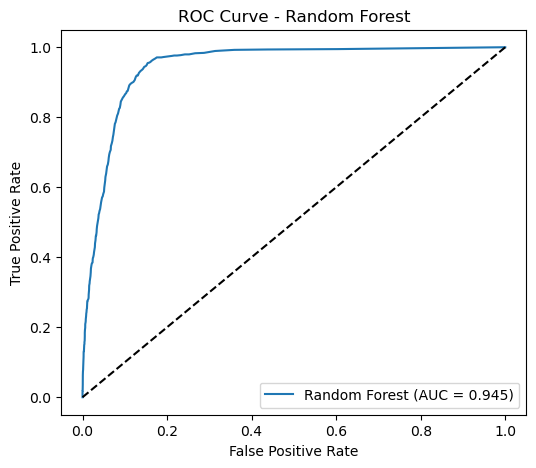

In [23]:
# Get predicted probabilities
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("Random Forest ROC-AUC:", roc_auc_rf)

# Compute ROC curve values
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


# Step 14: ROC Curve Comparison: Logistic Regression vs Random Forest

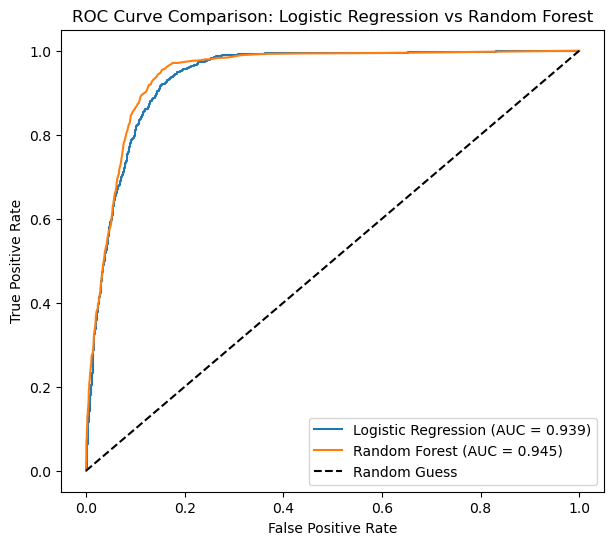

In [24]:
# ---- Logistic Regression probabilities ----
y_prob_log = log_model.predict_proba(X_test)[:, 1]
roc_auc_log = roc_auc_score(y_test, y_prob_log)
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)

# ---- Random Forest probabilities ----
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# ---- Plot combined ROC curves ----
plt.figure(figsize=(7,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Logistic Regression vs Random Forest')
plt.legend(loc='lower right')
plt.show()


### iNSIGHT 
The Random Forest model shows a higher ROC-AUC than Logistic Regression, indicating better ability to distinguish between customers who subscribe and those who do not. Logistic Regression provides a strong baseline with interpretability, while Random Forest captures non-linear relationships and feature interactions, leading to improved performance.

# Step 15: Model Explainability using SHAP

SHAP (SHapley Additive exPlanations) is used to explain individual model predictions.
It helps understand:
- Which features influenced a prediction
- Whether they increased or decreased the probability of subscription

In this section:
- We explain **5 individual predictions**
- Using **visual explanations only**


In [26]:
import shap
import matplotlib.pyplot as plt

rf = rf_model.named_steps['model']
feature_names = rf_model.named_steps['preprocess'].get_feature_names_out()
X_test_transformed = rf_model.named_steps['preprocess'].transform(X_test)

sample_indices = [0, 1, 2, 3, 4]
X_sample = X_test_transformed[sample_indices]

explainer = shap.TreeExplainer(rf)

shap_values_5 = explainer.shap_values(X_sample, check_additivity=False)

print("SHAP values calculated for 5 samples")


SHAP values calculated for 5 samples


SHAP Explanation for Sample 1


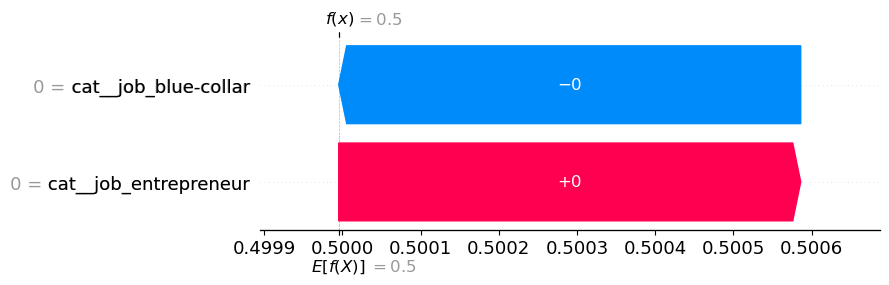

SHAP Explanation for Sample 2


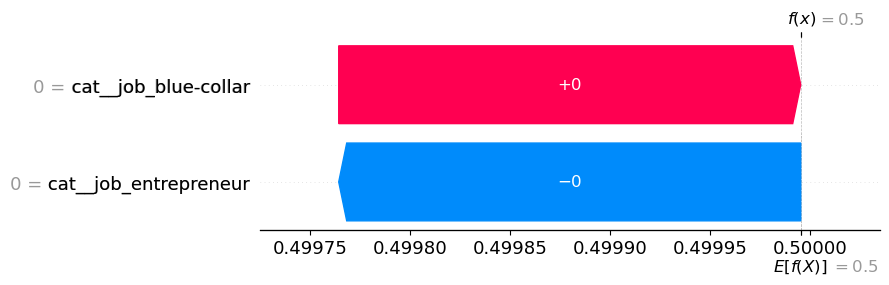

SHAP Explanation for Sample 3


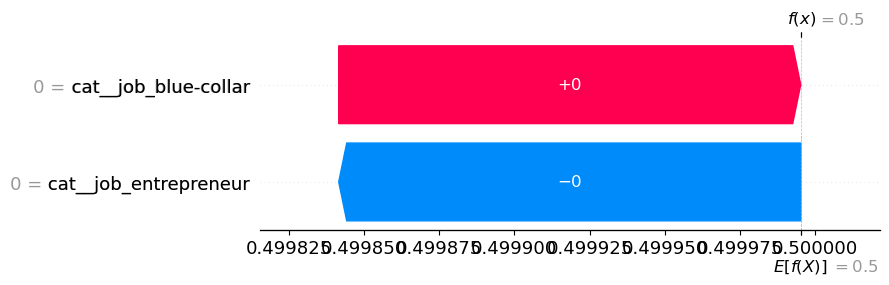

SHAP Explanation for Sample 4


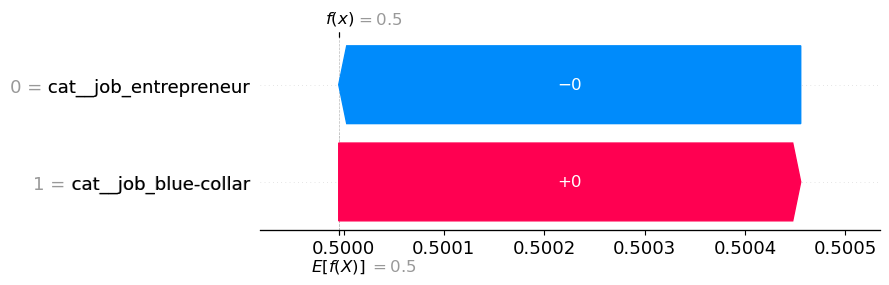

SHAP Explanation for Sample 5


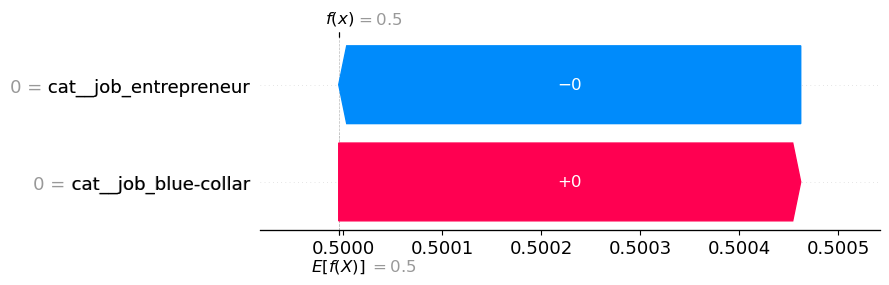

In [27]:
for i in range(len(sample_indices)):
    print(f"SHAP Explanation for Sample {i+1}")

    explanation = shap.Explanation(
        values=shap_values_5[1][i],
        base_values=explainer.expected_value[1],
        data=X_sample[i],
        feature_names=feature_names
    )

    shap.plots.waterfall(explanation, max_display=10)
    plt.show()


## Final Conclusion and Insights

In this project, a machine learning solution was developed to predict whether a bank customer would subscribe to a term deposit following a marketing campaign. The Bank Marketing dataset was explored using visualization-based EDA to understand customer behavior and data patterns.

Two classification models were trained and evaluated: Logistic Regression and Random Forest. Logistic Regression provided a strong and interpretable baseline, while Random Forest achieved better overall performance by capturing non-linear relationships and feature interactions within the data.

Model evaluation was performed using Confusion Matrices, Classification Reports, ROC curves, and ROC-AUC scores. The combined ROC curve comparison showed that the Random Forest model had a higher ROC-AUC value, indicating superior ability to distinguish between customers who subscribe and those who do not. This makes Random Forest a more effective model for this prediction task, particularly given the class imbalance in the dataset.

To ensure model transparency, SHAP was used to explain individual predictions from the Random Forest model. Five customer predictions were analyzed using SHAP waterfall plots, which clearly demonstrated how specific features contributed to each prediction. These explanations confirmed that factors such as call duration, previous campaign outcomes, and customer demographics play a significant role in subscription decisions.

Overall, this project demonstrates how machine learning models, combined with proper evaluation metrics and explainability techniques, can support data-driven decision making in marketing campaigns. The final model can help banks optimize targeting strategies, reduce operational costs, and improve campaign effectiveness while maintaining interpretability and trust in predictions.
